In [40]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
url = 'https://www.scrapethissite.com/pages/simple/'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/133.0.0.0 Safari/537.36 Edg/133.0.0.0'}


In [25]:
response = requests.get(url, headers=headers)
if (response.status_code == 200):
    print('page retrieved successfully')
else:
    print('Failed to retrieve page')
    exit(1)

page retrieved successfully


In [26]:
soupp = BeautifulSoup(response.text, 'html.parser')


In [27]:
countries = soupp.find_all('div',class_ = 'country')

In [28]:
with open(r'D:\data_science\porblems\test_csv\coountries.csv','w',newline = '', encoding = 'utf-8') as csvfile:
    feildname = ['country','capitals','population','area']
    writer = csv.DictWriter(csvfile, feildname)
    writer.writeheader()
    for country in countries:
        name =  country.find('h3', class_ = 'country-name').text.strip()
        capital = country.find('span', class_ = 'country-capital').text.strip()
        population = country.find('span', class_ = 'country-population').text.strip()
        area = country.find('span', class_ = 'country-area').text.strip()
        writer.writerow({
            'country':name,
            'capitals':capital,
            'population':population,
            'area':area
        })
        

Country: Zimbabwe
Capital: Harare
Population: 11651858
Area: 390580.0
----------------------------------------


In [33]:
df = pd.read_csv(r'D:\data_science\porblems\test_csv\coountries.csv')

In [34]:
df

,country,capitals,population,area
0,Andorra,Andorra la Vella,84000,468.0
1,United Arab Emirates,Abu Dhabi,4975593,82880.0
2,Afghanistan,Kabul,29121286,647500.0
3,Antigua and Barbuda,St. John's,86754,443.0
4,Anguilla,The Valley,13254,102.0
...,...,...,...,...
245,Yemen,Sanaa,23495361,527970.0
246,Mayotte,Mamoudzou,159042,374.0
247,South Africa,Pretoria,49000000,1219912.0
248,Zambia,Lusaka,13460305,752614.0


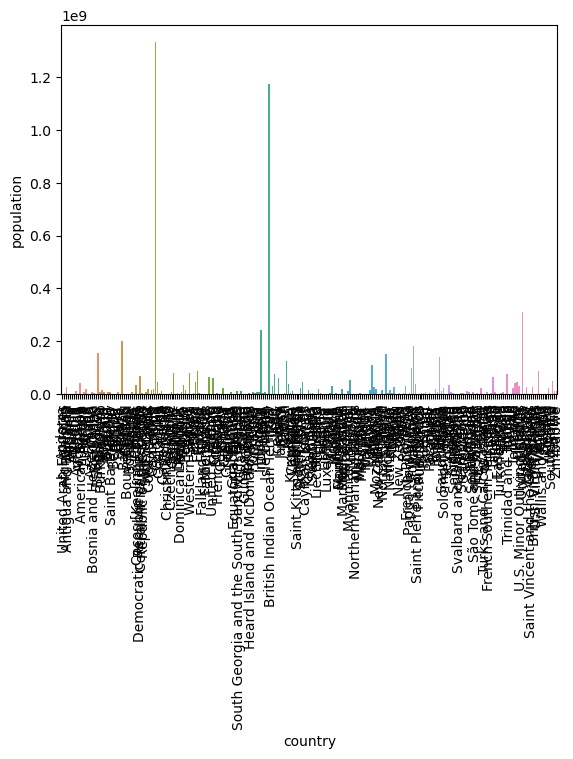

In [44]:
sns.barplot(data = df,x = 'country',y = 'population')
plt.xticks(rotation = 90)
plt.show()

NameError: name 'x' is not defined